#3. Describing The Data - Descriptive Statistics A Review.

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

##2. Patient Blood Pressure Readings:

• Context: A health researcher is analyzing systolic blood pressure levels from a clinic.

Systolic Blood Pressure

118 122 125 130 135 138 142 144 146 150 152 155 160 162 165

Table 3: Systolic Blood Pressure of 15 patients.

###Compute the mean, median, and standard deviation




In [4]:
#Calculate Mean, Median and Standard Deviation
bp=np.array([118, 122, 125, 130, 135, 138, 142, 144, 146, 150, 152, 155, 160, 162, 165])
bp_mean=np.mean(bp)
bp_median=np.median(bp)
bp_std=np.std(bp)
print(f"Mean:{bp_mean:.2f}")
print(f"Median: {bp_median}")
print(f"Standard Deviation: {bp_std:.2f}")

Mean:142.93
Median: 144.0
Standard Deviation: 14.30


### Plot a histogram. Is the distribution skewed?

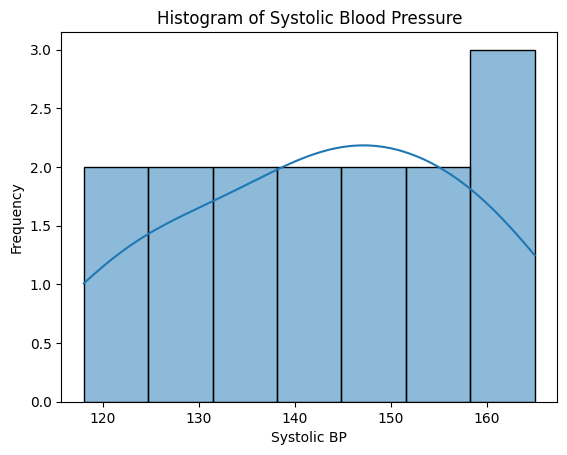

Skewness: -0.20


In [5]:
#Plot Histogram
sns.histplot(bp,bins=7,kde=True)
plt.title("Histogram of Systolic Blood Pressure")
plt.xlabel("Systolic BP")
plt.ylabel("Frequency")
plt.show()
#Skewness
skewness=pd.Series(bp).skew()
print(f"Skewness: {skewness:.2f}")

### Compute the IQR. Identify any patients with unusually high blood pressure

In [6]:
#Compute IQR
Q1=np.percentile(bp,25)
Q3=np.percentile(bp,75)
IQR=Q3 -Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
#Check for outliers
outliers=bp[(bp<lower_bound)|(bp>upper_bound)]
print(f"IQR:{IQR}")
print(f"Outliers:{outliers}")

IQR:21.0
Outliers:[]


###Explain whether these statistics support that the clinic population has a normal range of BP levels.

It has symmetrical distribution as mean is equivalent to median.

Skewness is close to 0 which means low skewness.

Histogram also shows normal distribution as there is no extreme skew.

Since there is no outliers it supports normal distribution.

##3. Retail Sales Summary:


• Context: A store tracks daily sales (Nrs.) over 2 weeks:

Stores Daily Sales

212 198 245 210 230 185 270 205 190 250 260 225 215 195

Table 4: Daily Sales.

### Calculate: Mean, median, mode, range, variance, standard deviation

In [8]:
sales=[212, 198, 245, 210, 230, 185, 270, 205, 190, 250, 260, 225, 215, 195]
# Calculate Mean, Median, Mode, Range, Variance, Standard Deviation
sales_mean=np.mean(sales)
sales_median=np.median(sales)
sales_mode=stats.mode(sales, keepdims=False).mode
sales_range=np.max(sales)-np.min(sales)
sales_variance=np.var(sales)
sales_std=np.std(sales)
#Display results
print(f"Mean:{sales_mean:.2f}")
print(f"Median:{sales_median}")
print(f"Mode:{sales_mode}")
print(f"Range:{sales_range}")
print(f"Variance:{sales_variance:.2f}")
print(f"Standard Deviation:{sales_std:.2f}")

Mean:220.71
Median:213.5
Mode:185
Range:85
Variance:670.78
Standard Deviation:25.90


### Draw a bar chart of daily sales and annotate any highs/lows


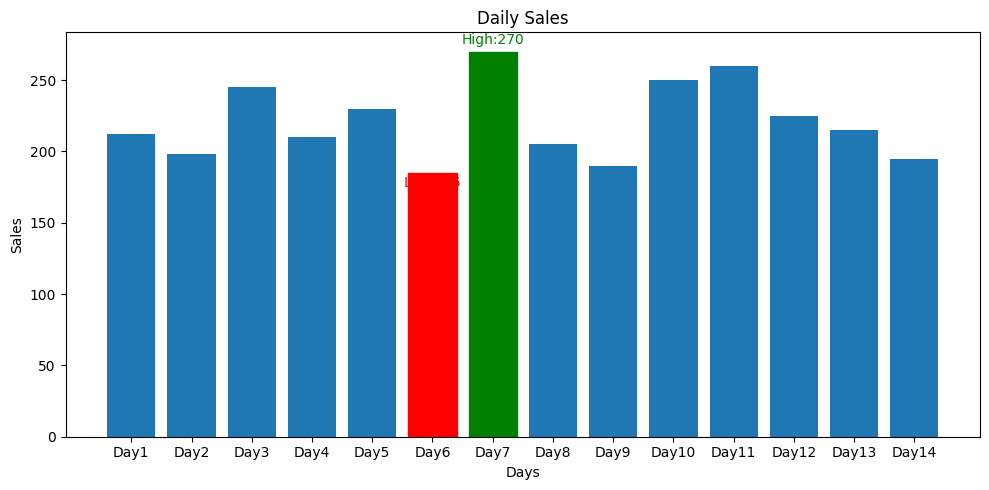

In [9]:
days=[f'Day{i+1}'for i in range(len(sales))]
#Bar Chart
plt.figure(figsize=(10, 5))
bars=plt.bar(days,sales)
plt.title("Daily Sales")
plt.xlabel("Days")
plt.ylabel("Sales")

#Annote highest and lowest sales
max_idx=np.argmax(sales)
min_idx=np.argmin(sales)
plt.text(max_idx,sales[max_idx]+5,f"High:{sales[max_idx]}",ha='center',color='green')
plt.text(min_idx,sales[min_idx]-10,f"Low:{sales[min_idx]}",ha='center',color='red')
bars[max_idx].set_color('green')
bars[min_idx].set_color('red')

plt.tight_layout()
plt.show()

There is large spread of data which indicates variability .

### Comment on consistency of sales - do the spread and measures indicate a steady flow?


In [10]:
#Sample lower days
actual_sundays=[185,190]
#Reverse the 20% dip
adjusted_sundays=[185/0.8,190/0.8]

sales_adj=sales.copy()
sales_adj[5]=adjusted_sundays[0]
sales_adj[8]=adjusted_sundays[1]
print("Adjusted Mean:",np.mean(sales_adj))
print("Adjusted Std Dev:",np.std(sales_adj,ddof=1))

Adjusted Mean: 227.41071428571428
Adjusted Std Dev: 23.100034786615737


### Suppose Sunday sales are usually 20% lower than the other days. How would this affect interpretation?

It makes the overall average appear lower than weekday sales and may add variation that might not reflect on regular demand patterns.

# Descriptive - {Numerical and Graphical} Analysis of Data.

##  Advanced Case Studies - Numerical Summary:

For the following task, please feel free to use Python programming and any library that you find suitable.


###1. Case 1 - Dropout Risk Assessment:

• Context: A University program is concerned about students dropping out in their first year.

You are given GPA scores of 120 first - year students and their dropout status.
Status GPA Mean GPA Std. Dev n

Dropped Out 2.1 0.6 30

Retained 3.1 0.5 90

Table 5: GPA Statistics with Decimal Alignment

#### Compute and compare the coefficient of variation (CV) for both groups

In [11]:
#Coefficient of variation
dropout_cv=(0.6/2.1)*100
retained_cv=(0.5/3.1)*100
print(f"Dropout CV:{dropout_cv:.2f}%")
print(f"Retained CV:{retained_cv:.2f}%")

Dropout CV:28.57%
Retained CV:16.13%


#### Interpret: Which group shows greater relative variability in GPA?

The CV of dropout is higher than retained student suggestingg higher relative variability in GPA score representing more inconsistency in their academic performance.

#### Suppose 5 of the 30 dropout GPAs were missing. How would that affect your analysis?

If 5 of the 30 dropout GPAs are missing which reduces the dropout data to 25 and could affect the value of mean and standard deviation as if the missing value is not random, variability and mean can be over or underestimated. As well as affect CV accuracy.

#### Discuss limitations of only using mean and standard deviation here—what’s missing?

Limitation of using mean and standard deviation are:  
- Mean is sensitive to outliers
- It doesnot show the skewness
- Standard deviation assume normality

#### Sketch boxplots to compare GPA distributions between groups.


/tmp/ipython-input-12-1027052386.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data,labels=labels,patch_artist=True,boxprops=dict(facecolor='lightblue'),medianprops=dict(color='red'),flierprops=dict(markerfacecolor='orange',marker='o'))


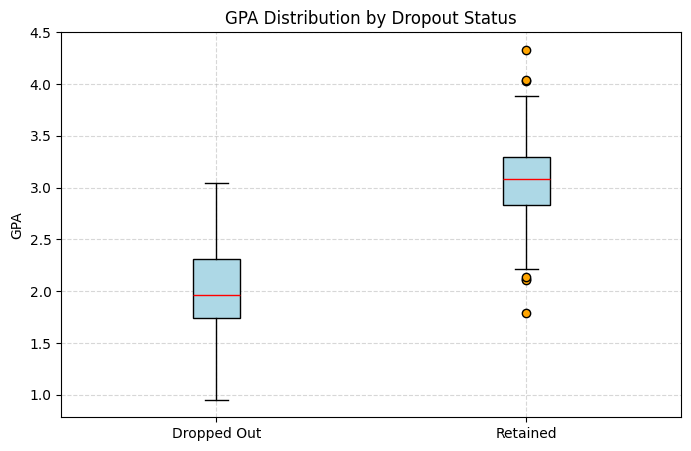

In [12]:
np.random.seed(42)
dropout_gpas = np.random.normal(2.1, 0.6, 30)
retained_gpas = np.random.normal(3.1, 0.5, 90)
# Create boxplot
data = [dropout_gpas, retained_gpas]
labels = ['Dropped Out', 'Retained']
plt.figure(figsize=(8, 5))
plt.boxplot(data,labels=labels,patch_artist=True,boxprops=dict(facecolor='lightblue'),medianprops=dict(color='red'),flierprops=dict(markerfacecolor='orange',marker='o'))
plt.title('GPA Distribution by Dropout Status')
plt.ylabel('GPA')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### 2. Case 2 - Gender Pay Gap Investigation:


Context: A tech company releases salary data (in $1000s) for 100 male and 80 female employees.

Gender Mean Median SD

Male 105 98 18
Female 92 90 25

Table 6: Statistical Comparison by Gender


#### Interpret the difference between mean and median in both groups—are outliers likely?

In [13]:
#Calculate Meand and median for each gender
male_salaries=[90,95,98,110,132]
female_salaries=[85,88,90,95,102]
mean_male=np.mean(male_salaries)
median_male=np.median(male_salaries)
mean_female=np.mean(female_salaries)
median_female =np.median(female_salaries)
#Display results
print(f"Male Mean:{mean_male}, Median:{median_male}")
print(f"Female Mean:{mean_female}, Median:{median_female}")

Male Mean:105.0, Median:98.0
Female Mean:92.0, Median:90.0


Outliers are likely to be present in both groups but especially among males, as the gap between mean and median is larger.

Male : Right-Skewed Distribution
Female: Slight right skewed

#### Compute and compare IQRs if Q1 and Q3 for males are 90 and 110, and for females are 85 and 105.


In [14]:
#Compute IQR
male_iqr=110-90
female_iqr=105-85
#Display result
print(f"Male IQR:{male_iqr}")
print(f"Female IQR:{female_iqr}")

Male IQR:20
Female IQR:20


#### Discuss which measure of central tendency best reflects typical salary for each group.


Best Measure if Central Tendency :
- For both the groups, median is better as it is robust to skew and outliers.

#### Suggest a visualization that could reveal more about potential pay gaps and justify your choice.

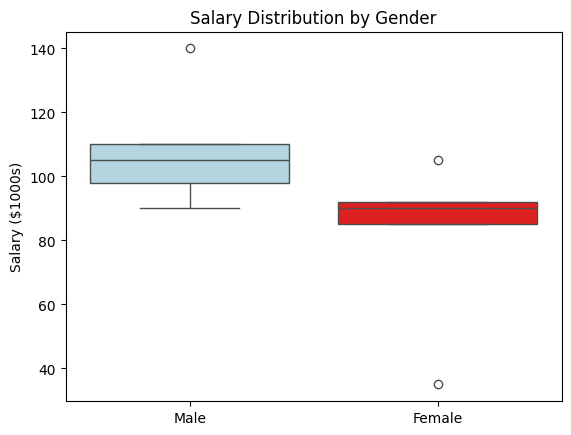

In [15]:
#Box Plot
sns.boxplot(data=[[90,98,105,110,140],[85,90,92,105, 35]],palette=["lightblue","red"])
plt.xticks([0, 1], ['Male', 'Female'])
plt.title("Salary Distribution by Gender")
plt.ylabel("Salary ($1000s)")
plt.show()

#### Consider the Simpson’s Paradox—how might departmental breakdowns affect these results?

Example Scenario:

Tech roles (higher-paying) have more men.

HR/Support roles (lower-paying) have more women.

which shows the overall average got more worse for the women due to role division. So, it might give a different result when we observed all the department for the women stats

### 3. Case 3 - Fitness Tracker Accuracy:

Context: Two fitness trackers (Brand A and Brand B) record the number of steps per day for 15 users over 7 days. Below is the aggregated average and standard deviation per brand:

Tracker Mean Steps SD Median IQR

A 8050 310 8000 430

B 8250 800 8100 1100


####  Which tracker has more consistent measurements? Use CV to justify

In [16]:
#Calculate cv
cv_A= (310/8050)*100
cv_B=(800/8250)*100
print(f"Tracker A CV:{cv_A:.2f}%")
print(f"Tracker B CV:{cv_B:.2f}%")
#Tracker A is significantly more consitent as it has lower variation.

Tracker A CV:3.85%
Tracker B CV:9.70%


#### Why might Tracker B have higher mean but lower median?


Tracker B have a higher mean but lower median due to outliers and overestimation present in the data.

#### Interpret how IQR and SD together inform the nature of variability

When the Standard deviation (SD) and IQR both are low there is less variability and there is tight distribution of data whereas when the SD and IQR are high there is high variability both centrally and in ectremes.

#### A user claims Tracker B is ”more optimistic.” How would you statistically evaluate this claim?

Being more optimistic means it reports to higher step counts. So the mean of B is greater than mean of A which supports that Tracker B is more optimistics.

### 4. Case 4 - Vaccine Response Data:


Context: In a vaccine trial, antibody levels were measured in two age groups post-vaccination.
Age Group Mean Median SD Min Max
(AU/mL) (AU/mL) (AU/mL) (AU/mL) (AU/mL)
Under 40 840 800 140 500 1100
Over 60 620 610 85 480 800

#### Discuss which group shows more spread relative to their center.

In [17]:
#Calculate cv
under_cv=(140/840)*100
over_cv=(85/620)*100
#Display result
print("CV under 40:",under_cv)
print("CV under 60:",over_cv)

CV under 40: 16.666666666666664
CV under 60: 13.709677419354838


Under 40 group , we can see more spread of data and variation.

#### Plot overlapping histograms or boxplots to visualize distribution differences

/tmp/ipython-input-18-2805214711.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, patch_artist=True,boxprops=dict(facecolor='lightblue'),medianprops=dict(color='red'))


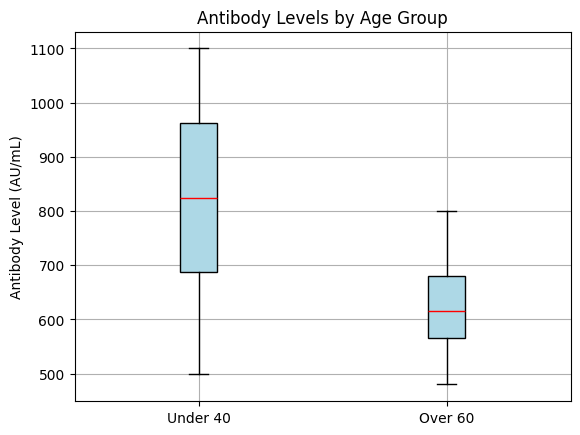

In [18]:
under40 = [500, 650, 800, 850, 1000, 1100]
over60 = [480, 550, 610, 620, 700, 800]
data = [under40, over60]
labels = ['Under 40', 'Over 60']
#Box PLot
plt.boxplot(data, labels=labels, patch_artist=True,boxprops=dict(facecolor='lightblue'),medianprops=dict(color='red'))
plt.title('Antibody Levels by Age Group')
plt.ylabel('Antibody Level (AU/mL)')
plt.grid(True)
plt.show()

#### Identify which summary statistics might be misleading if data is bimodal.

If data is Bimodal then mean can be misleading and may not represent any actual group and standard deviation could overstate spread due to gap between modes.

#### Suggest how the five-number summary could help identify immune outliers.


Five-Nummber Summary (Min ,Q1, Median,Q3,Max) helps to identify the low responsder (below Q1) , high responder(above Q3), and Outliers (points beyond the range).

#### Consider ethical implications: Should dosage adjustments be made? Justify using descriptive analysis.

The data shows the older adults are less responsive to vaccine. Adjustments might include higher dose for older adult.

### Case 5 - E - Commerce Performance:

Context: An e-commerce company tracks daily cart values (in $) for two types of users over 30 days:


### Calculate and compare CVs.


In [19]:
#Calculate cv
cv_new=(30/85)*100
cv_returning=(20/95)*100
print(f"New User CV:{cv_new:.2f}%")
print(f"Returning User CV:{cv_returning:.2f}%")

New User CV:35.29%
Returning User CV:21.05%


New user are more volatile in spending behaviour and returning users are more consistent and predictable.

#### Determine which group is more skewed and explain the implication.

If new users are more skewed (positively), it could mean. Most new users spend little, but a few spend a lot, possibly due to promotions or special deals.Returning users may be less skewed and more consistent.

#### Suppose a campaign increased new user spending on a few days. How would that affect measures?

If a campaign increased new user spending on a few days then mean CV,Standard deviation and Skewness will increase and median cv mightly remain unchanged.

#### Propose at least 2 descriptive statistics techniques for business insights here.


Two descriptive statistics technique ifor business insights are

a. Box Plot

b.Histogram


## 4.2 Advanced Case Studies - Graphical Summary:


### 1. Case 1 - Daily Sales Trends in Two Product Categories:

#### Visualize the distribution of total sales for each category using boxplots and histograms.Interpret central tendency and spread.

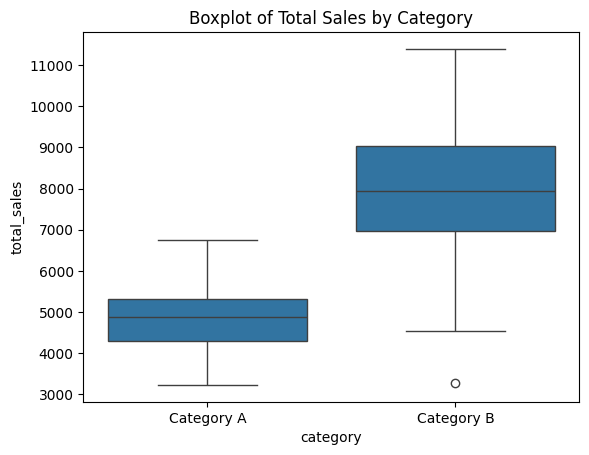

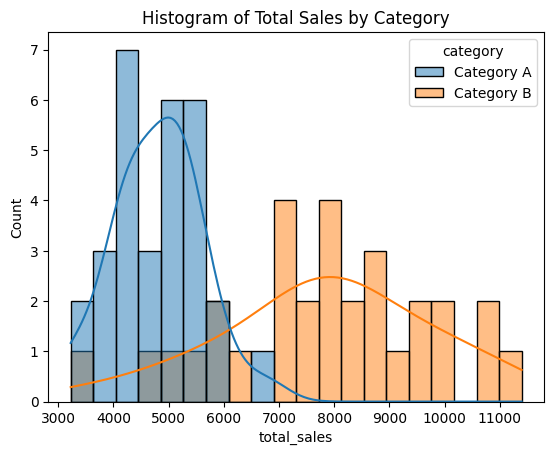

In [21]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Data Analysis : Summer Class/daily_sales.csv")
df['date'] = pd.to_datetime(df['date'])
# Visualize Boxplot
sns.boxplot(x='category', y='total_sales', data=df)
plt.title("Boxplot of Total Sales by Category")
plt.show()
# Visualize Histogram
sns.histplot(data=df, x='total_sales', hue='category', kde=True, bins=20)
plt.title("Histogram of Total Sales by Category")
plt.show()

#### Create a time series plot of daily total sales. Are there visible trends or outliers?

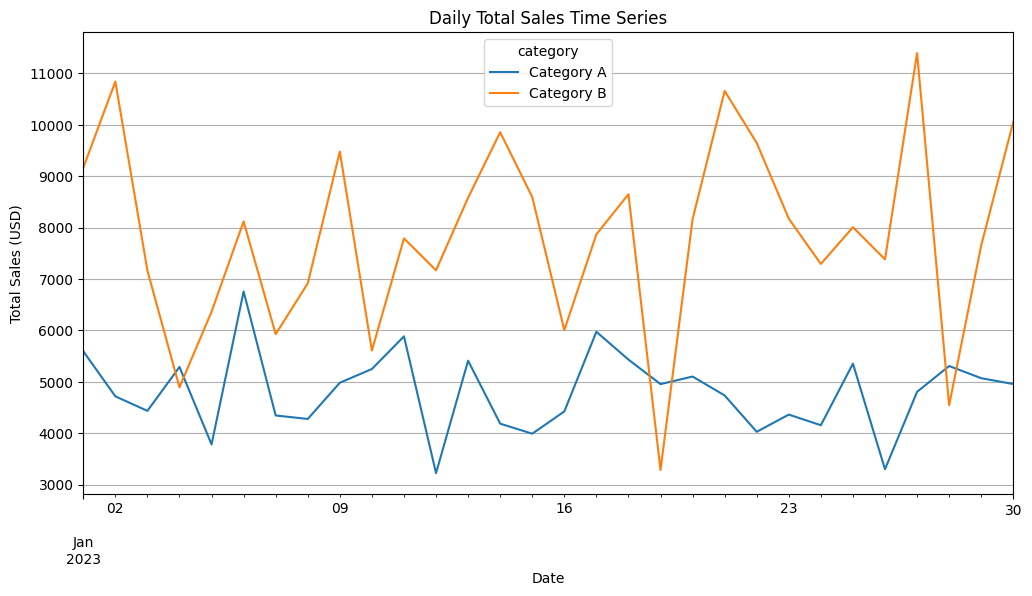

In [22]:
pivot_sales = df.pivot(index='date', columns='category', values='total_sales')
pivot_sales.plot(figsize=(12, 6), title="Daily Total Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.show()

#### Calculate Coefficient of Variation (CV) for total sales and avg basket for each category. Which category is more variable?


In [23]:
for category in df['category'].unique():
    sub_df = df[df['category'] == category]

    total_sales_cv = sub_df['total_sales'].std() / sub_df['total_sales'].mean()
    avg_basket_cv = sub_df['avg_basket'].std() / sub_df['avg_basket'].mean()

    print(f"Category {category}:")
    print(f"Total Sales CV= {total_sales_cv:.2f}")
    print(f"Average Basket CV= {avg_basket_cv:.2f}")
    print() #Print in readable format

Category Category A:
Total Sales CV= 0.16
Average Basket CV= 0.20

Category Category B:
Total Sales CV= 0.24
Average Basket CV= 0.27



Categoty B is more variable.

#### Compute and visualize a 7-day moving average for both categories. Discuss stability and implications for business planning.

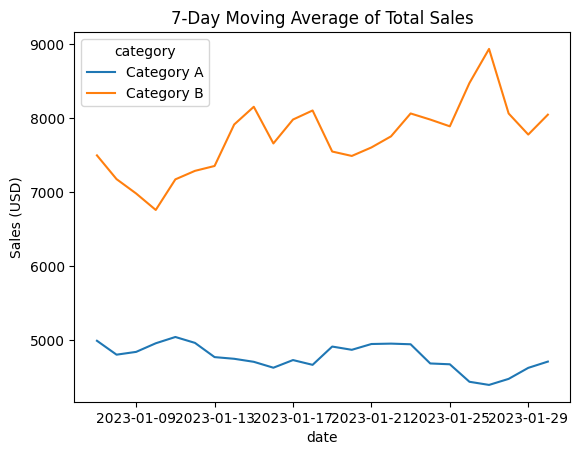

In [25]:
df_sorted = df.sort_values('date')
df_sorted['7_day_ma'] = df_sorted.groupby('category')['total_sales'].transform(lambda x: x.rolling(7).mean())
#Visualize line plot
sns.lineplot(data=df_sorted, x='date', y='7_day_ma', hue='category')
plt.title("7-Day Moving Average of Total Sales")
plt.ylabel("Sales (USD)")
plt.show()

Category A shows more stability.

#### Discuss: How would a flash sale or promotional campaign distort the mean? How can you account for it in visuals or summaries?


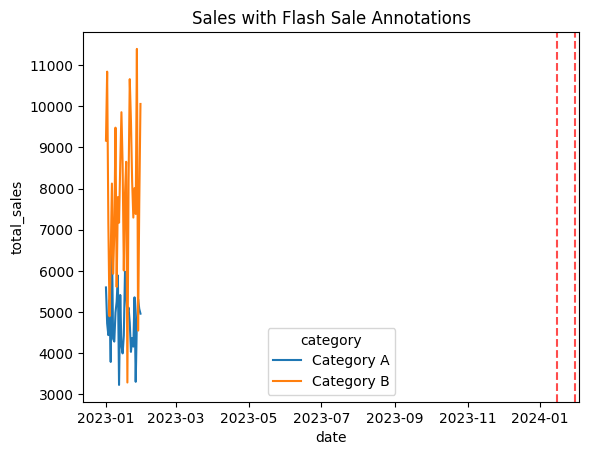

In [26]:
# Suppose flash sale was on 2024-01-15
flash_dates = ['2024-01-15', '2024-01-30']
# Add indicator
df['flash_sale'] = df['date'].isin(pd.to_datetime(flash_dates))
# Visualize with highlight
sns.lineplot(data=df, x='date', y='total_sales', hue='category')
for d in flash_dates:
    plt.axvline(pd.to_datetime(d), color='red', linestyle='--', alpha=0.7)
plt.title("Sales with Flash Sale Annotations")
plt.show()


A flash sale can spike total_sales as a result increasing the mean but not reflecting typical performance.

### 2. Case 2 - Customer Spending by Segment:

Context: You are analyzing customer transaction data over the last quarter to understand the
behavior of two customer segments:
– Student.
– Working Professionals.
• Each customer has multiple transactions. You are given customer segments.csv dataset with
columns:
– customer id, segment, transaction amount, date

#### Create a violin plot and strip plot of transaction amount for each segment. What can you infer about skewness, modality, and outliers?

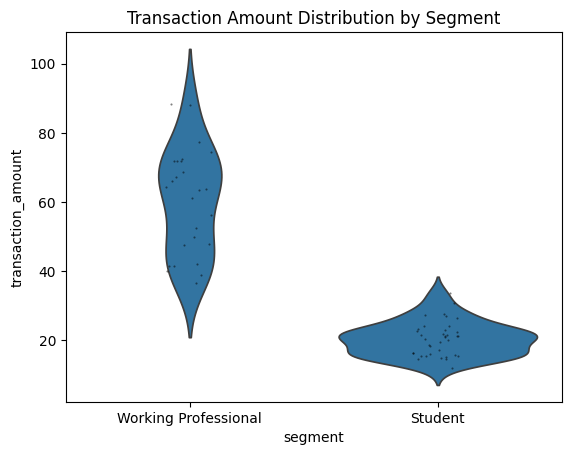

In [28]:
df = pd.read_csv("/content/drive/MyDrive/Data Analysis : Summer Class/customer_segments.csv")
sns.violinplot(x='segment', y='transaction_amount', data=df, inner=None)
sns.stripplot(x='segment', y='transaction_amount', data=df, color='black', size=1.5, alpha=0.5)
plt.title("Transaction Amount Distribution by Segment")
plt.show()

Working professionals are slightly skewed (bimodal) with dfew large -value purchase.

Students plot is flat or quite symmetric wich some lower and upper edge points.

#### Plot a density plot (KDE) of transaction amount per segment. Which segment shows more variability? Which one has higher spending tendencies?


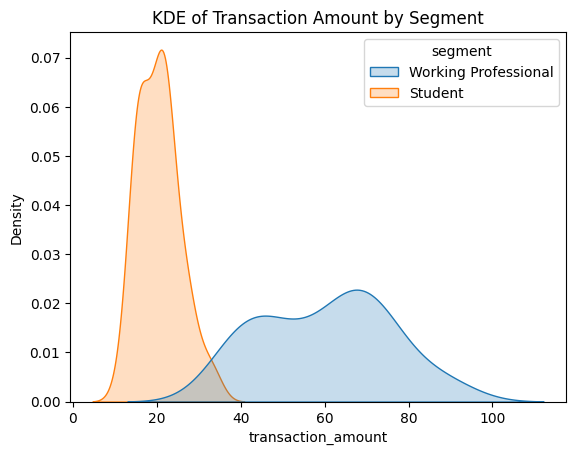

In [29]:
#Plot a density plot (KDE)
sns.kdeplot(data=df, x='transaction_amount', hue='segment', common_norm=False, fill=True)
plt.title("KDE of Transaction Amount by Segment")
plt.show()

Working professionals have higher spending tecndencies and more variability.

#### Compute mean, median, IQR, and CV for each group and display them in a summary table.

In [34]:
# Step 1: Basic aggregation
summary = df.groupby('segment')['transaction_amount'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
# Step 2: Compute Q1 and Q3 using .quantile() outside of agg
q1 = df.groupby('segment')['transaction_amount'].quantile(0.25)
q3 = df.groupby('segment')['transaction_amount'].quantile(0.75)
# Step 3: Add Q1, Q3, IQR, and CV
summary['Q1'] = q1
summary['Q3'] = q3
summary['IQR'] = summary['Q3'] - summary['Q1']
summary['CV'] = summary['std'] / summary['mean']
# Final summary view
print(summary[['mean', 'median', 'Q1', 'Q3', 'IQR', 'CV']])


                           mean  median       Q1     Q3      IQR        CV
segment                                                                   
Student               20.515676   20.92  16.0800  23.13   7.0500  0.241688
Working Professional  60.229231   63.69  47.7075  71.79  24.0825  0.251631


#### Construct a boxplot with swarm overlay to visualize typical vs. exceptional spending behavior. Do the visuals agree with summary statistics?


Yes, the visuals agree with summary statistics.

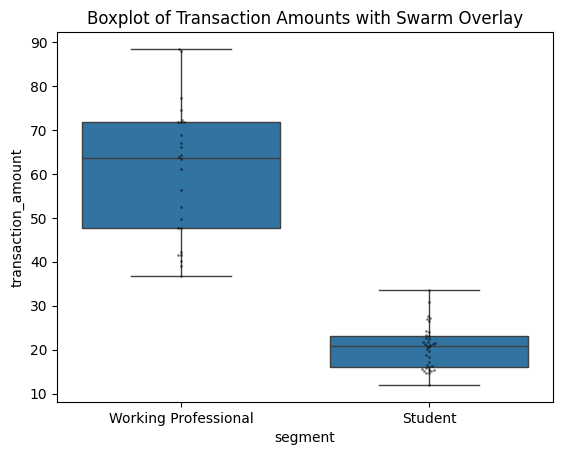

In [33]:
#Visualize box plot and swarmplot
sns.boxplot(x='segment', y='transaction_amount', data=df)
sns.swarmplot(x='segment', y='transaction_amount', data=df, color='black', size=2, alpha=0.5)
plt.title("Boxplot of Transaction Amounts with Swarm Overlay")
plt.show()

#### Create a scatter plot of number of transactions vs. total spending for each customer, colorcoded by segment. What does the relationship suggest about loyalty or value?


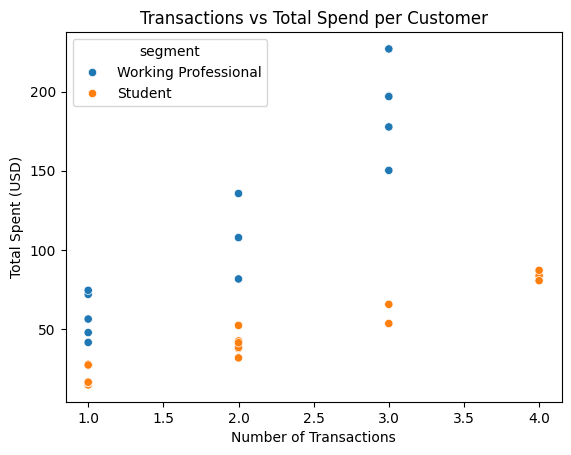

In [35]:
# Compute number of transactions and total spending per customer
customer_stats = df.groupby(['customer_id', 'segment']).agg(num_transactions=('transaction_amount', 'count'),total_spent=('transaction_amount', 'sum')).reset_index()
# Scatter plot
sns.scatterplot(data=customer_stats, x='num_transactions', y='total_spent', hue='segment')
plt.title("Transactions vs Total Spend per Customer")
plt.xlabel("Number of Transactions")
plt.ylabel("Total Spent (USD)")
plt.show()

Working professional have high loyalty and high value  which means they are high spenders and return more often whereas student are moderate loyal as they make repeated purchase but still have low value means they are low spender.

#### Discuss: If you were to target one of the groups for a premium membership offer, what would guide your decision based on this analysis?

I would target the working professional as they spend more money in each transactions and have higher loyalty as they will make purachase more frequently.